# **Moscow City apartment analysis , visualization and prediction**

For this individual project, I am working with Moscow Apartment Listings dataset that can be found [here](https://www.kaggle.com/alexeyleshchenko/moscow-apartment-listings).

The dataset consists of 12,181 samples with 22 features explained below:


*   price - listed price in russian rubles
*   repair - condition: 1-worst, 4-best
*   year_built_empty: "1" if we know the year of construction
*   house_age: 2020 - the year of construction
*   closest_subway: ID of the closest subway
*   dist_to_subway: distance to the closest subway in meters
*   sg: Subway grade: 0 - Underground 1 - Urban rail, 2 - Suburban rail, 3 - Monorail
*   lat: latitude
*   lon: longitude
*   subway_dist_to_center: distance of the closest subway to the city center in meters
*   h3: Uber's H3 geospatial code
*   agent_offers: number of listings by the same agent
*   subway_offers: number of listings in the vicinity of the same subway station
*   address offers: number of listings at the same address
*   rooms: number of rooms
*   footage: total footage in square meters
*   floor: the floor on which the apartment is situated
*   max_floor: total floors in the building
*   first_floor: "1" if the apartment is on the first floor
*   last_floor: "1" if the apartment is on the top floor
*   AO: district(административный округ)
*   hm: material from which the building is built




In [93]:
import pandas as pd
import numpy as np
apartment_listings = pd.read_csv('/content/moscow_apartment_listings.csv', encoding = 'Latin-1')

Here are the first 10 samples and we can conclude that data cleaning is compulsory because the names are confusing and some of the features are not needed for my work.

In [94]:
apartment_listings.head(10)

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel
5,8050000,2,0,38,59,962,0.0,55.622294,37.733555,17166,...,5,1.0,1,39.5,1,12,1,0,UAO,panel
6,10900000,2,0,35,59,556,0.0,55.620820,37.742283,17166,...,9,1.0,2,57.0,19,22,0,0,UAO,panel
7,8100000,2,0,32,59,859,0.0,55.623620,37.744280,17166,...,13,1.0,1,33.9,2,22,0,0,UAO,block
8,10000000,3,0,45,59,1323,0.0,55.622705,37.726583,17166,...,6,1.0,2,45.9,10,12,0,0,UAO,panel
9,9000000,3,0,44,59,796,0.0,55.618542,37.732072,17166,...,9,1.0,2,45.8,6,12,0,0,UAO,panel


**Current features:**

In [95]:
for i in range(len(apartment_listings.columns)):
    print(i, apartment_listings.columns[i])

0 price
1 repair
2 year_built_empty
3 house_age
4 closest_subway
5 dist_to_subway
6 sg
7 lat
8 lon
9 subway_dist_to_center
10 h3
11 agent_offers
12 subway_offers
13 address_offers
14 rooms
15 footage
16 floor
17 max_floor
18 first_floor
19 last_floor
20 AO
21 hm


## **DATA CLEANING**

**Improving the label names:**
* price -> price_rubles (because the dollar/ruble ratio is very high and the apartment prices are in millions, it is good to note that the price is in rubles)
* closest_subway -> closest_subway_id (the integer refers to ID)
* sg -> subway_grade (easier to understand, the shortcut in fact means noting)
* footage -> area (synonym but for me a better option)
* AO -> district (english word for "административный округ")
* hm -> material (easier to understand)

In [96]:
new_labels = ['price_rubles', 'repair', 'year_built_empty', 'house_age', 
              'closest_subway_id', 'dist_to_subway', 'subway_grade', 'lat', 
              'lon', 'subway_dist_to_center', 'h3', 'agent_offers', 
              'subway_offers', 'address_offers', 'rooms', 'area', 'floor',
              'max_floor', 'first_floor', 'last_floor', 'district', 'material']
apartment_listings.columns=new_labels
apartment_listings.head(5)

,price_rubles,repair,year_built_empty,house_age,closest_subway_id,dist_to_subway,subway_grade,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,area,floor,max_floor,first_floor,last_floor,district,material
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


**Dropping columns:**

* repair (redundant)
* year_built_empty (not really efficient)
* h3 (redundant)
* address_offers (not useful)
* first_floor and last_floor (floor and max_floor info are enough)

In [97]:
apartment_listings.drop(["repair", "year_built_empty", "h3", "address_offers", "first_floor", "last_floor"], axis=1, inplace=True)
apartment_listings

,price_rubles,house_age,closest_subway_id,dist_to_subway,subway_grade,lat,lon,subway_dist_to_center,agent_offers,subway_offers,rooms,area,floor,max_floor,district,material
0,8000000,42,59,960,0.0,55.609009,37.734632,17166,1,5,1,39.4,11,12,UAO,panel
1,7200000,43,59,802,0.0,55.608760,37.741936,17166,1,9,1,35.6,2,9,UAO,panel
2,10300000,43,59,638,0.0,55.610207,37.742495,17166,57,9,2,53.0,5,12,UAO,panel
3,8500000,43,59,929,0.0,55.624017,37.740373,17166,292,5,2,44.1,8,9,UAO,panel
4,9000000,43,59,785,0.0,55.609107,37.740430,17166,292,5,2,44.2,6,9,UAO,panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,8700000,47,135,423,2.0,55.813536,37.470033,11088,1,1,1,36.2,2,17,SZAO,monolith
12177,9450000,31,135,581,2.0,55.809024,37.475441,11088,1,2,1,38.3,6,22,SZAO,panel
12178,19000000,19,135,842,2.0,55.817794,37.464824,11088,1,2,1,55.8,11,17,SZAO,monolith
12179,16900000,19,135,842,2.0,55.817794,37.464824,11088,1,1,2,62.0,15,17,SZAO,monolith


Changing feature "subway_grade" from float to integer because .0 is redundant and the grade is a integer.

In [98]:
apartment_listings['subway_grade'] = apartment_listings['subway_grade'].astype(int)
apartment_listings

,price_rubles,house_age,closest_subway_id,dist_to_subway,subway_grade,lat,lon,subway_dist_to_center,agent_offers,subway_offers,rooms,area,floor,max_floor,district,material
0,8000000,42,59,960,0,55.609009,37.734632,17166,1,5,1,39.4,11,12,UAO,panel
1,7200000,43,59,802,0,55.608760,37.741936,17166,1,9,1,35.6,2,9,UAO,panel
2,10300000,43,59,638,0,55.610207,37.742495,17166,57,9,2,53.0,5,12,UAO,panel
3,8500000,43,59,929,0,55.624017,37.740373,17166,292,5,2,44.1,8,9,UAO,panel
4,9000000,43,59,785,0,55.609107,37.740430,17166,292,5,2,44.2,6,9,UAO,panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,8700000,47,135,423,2,55.813536,37.470033,11088,1,1,1,36.2,2,17,SZAO,monolith
12177,9450000,31,135,581,2,55.809024,37.475441,11088,1,2,1,38.3,6,22,SZAO,panel
12178,19000000,19,135,842,2,55.817794,37.464824,11088,1,2,1,55.8,11,17,SZAO,monolith
12179,16900000,19,135,842,2,55.817794,37.464824,11088,1,1,2,62.0,15,17,SZAO,monolith


I use the describe() method to show the summary statistics of the numeric variables.


In [99]:
apartment_listings.describe()

,price_rubles,house_age,closest_subway_id,dist_to_subway,subway_grade,lat,lon,subway_dist_to_center,agent_offers,subway_offers,rooms,area,floor,max_floor
count,1.218100e+04,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000
mean,1.086987e+07,36.360644,100.585009,928.353748,0.242673,55.738639,37.618241,11938.048026,25.429932,10.176915,1.603973,46.153803,6.867334,13.449306
std,3.037320e+06,21.406406,56.707817,532.443508,0.629897,0.087598,0.134112,4711.729983,61.837916,7.078888,0.489090,10.543171,5.313950,6.413437
min,4.900000e+06,0.000000,0.000000,11.000000,0.000000,55.527631,37.306055,1133.000000,0.000000,1.000000,1.000000,30.100000,1.000000,2.000000
25%,8.500000e+06,17.000000,55.000000,548.000000,0.000000,55.674840,37.520435,8635.000000,1.000000,5.000000,1.000000,38.000000,3.000000,9.000000
50%,1.020000e+07,42.000000,103.000000,820.000000,0.000000,55.730855,37.604411,12418.000000,1.000000,8.000000,2.000000,44.500000,5.000000,12.000000
75%,1.270000e+07,54.000000,149.000000,1177.000000,0.000000,55.806115,37.720789,14800.000000,11.000000,13.000000,2.000000,53.400000,9.000000,17.000000
max,2.000000e+07,130.000000,199.000000,2988.000000,3.000000,55.941577,37.950668,24636.000000,292.000000,40.000000,2.000000,89.900000,38.000000,39.000000


## **Data Analysis**

The cell below we have 9937 apartments with cost of more than 8000000 rubles($65,000) in different districts in the city. That is 83% of the samples.

In [100]:
apartment_listings.loc[apartment_listings['price_rubles']>8000000,['price_rubles', 'area', 'district']].sort_values('price_rubles')

,price_rubles,area,district
9924,8050000,39.1,SVAO
5,8050000,39.5,UAO
761,8050000,40.4,UZAO
12083,8050000,38.0,SAO
2859,8050000,39.0,UZAO
...,...,...,...
10893,20000000,50.0,ZAO
10906,20000000,50.0,ZAO
9662,20000000,59.0,SZAO
10699,20000000,51.0,ZAO


If we do a search for apartments in the city center(CAO) which are cheaper than 9000000 rubles($73,200) , the result will be ONLY 9 apartments with area between 30 and 37 square meters.

In [101]:
apartment_listings.loc[(apartment_listings['district'] == 'CAO') & (apartment_listings['price_rubles']<9000000), ['price_rubles', 'area', 'district']].sort_values('price_rubles')

,price_rubles,area,district
11918,5700000,35.2,CAO
5789,7800000,31.5,CAO
10951,7800000,30.2,CAO
5759,8100000,31.2,CAO
5762,8500000,30.7,CAO
5791,8500000,30.7,CAO
6335,8500000,33.0,CAO
4170,8600000,37.5,CAO
10939,8970000,30.1,CAO


Let's do an analysis focused on apartments outside of the city center and their proximity to the center using subway.
We can conclude that there are 3391 apartments within 10km subway distance to the city center and their price varies from 5800000 to 20000000 rubles.

In [102]:
apartment_listings.loc[(apartment_listings['district'] != 'CAO') & (apartment_listings['subway_dist_to_center']<10000), ['price_rubles', 'dist_to_subway', 'subway_dist_to_center', 'district']].sort_values('price_rubles')

,price_rubles,dist_to_subway,subway_dist_to_center,district
9675,5800000,2890,7662,SZAO
4632,6500000,910,8722,UVAO
473,6500000,868,8355,VAO
4475,6500000,786,9000,UVAO
3992,6500000,924,7852,VAO
...,...,...,...,...
512,20000000,379,9905,UZAO
3631,20000000,1015,3421,SAO
11382,20000000,730,4759,UAO
9662,20000000,623,7662,SZAO


## **Data Visualization**

In [103]:
import seaborn as sns

**Correlation matrix for the apartment listings**

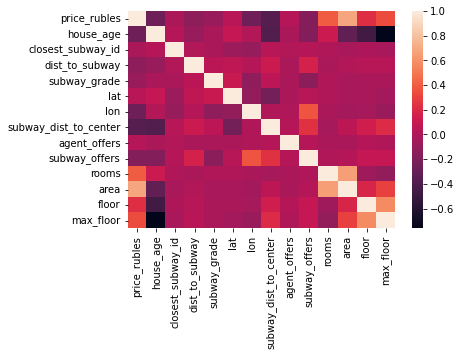

In [104]:
sns.heatmap(apartment_listings.corr())

**Scatter plot** with latitude and longitude to visualize the data from the most expensive to the least expensive areas. As expected the most expensive area is CAO or the city center of Moscow.

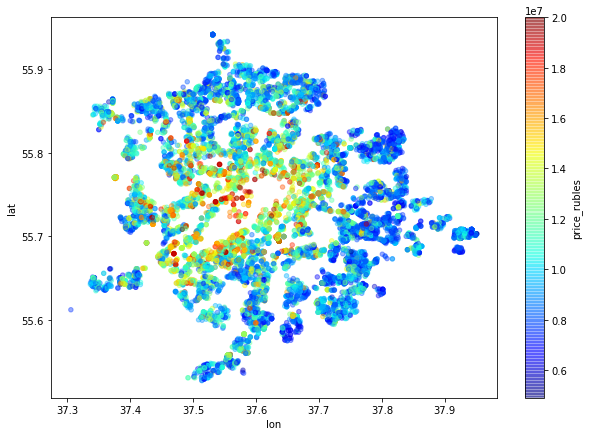

In [105]:
apartment_listings.plot(kind="scatter", x="lon", y="lat", alpha=0.4, 
                        figsize=(10,7), c="price_rubles", 
                        cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

Semantic mapping according to district using **seaborn**

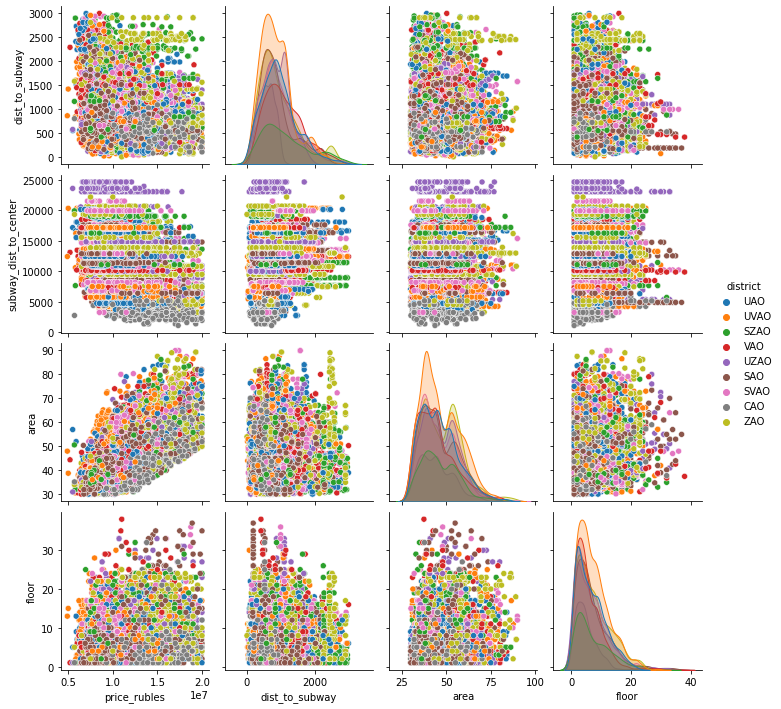

In [106]:
sns.pairplot(
    apartment_listings,
    x_vars=["price_rubles", "dist_to_subway", "area", "floor"],
    y_vars=["dist_to_subway", "subway_dist_to_center", "area", "floor"],
    hue="district"
)

Semantic mapping according to material used for building

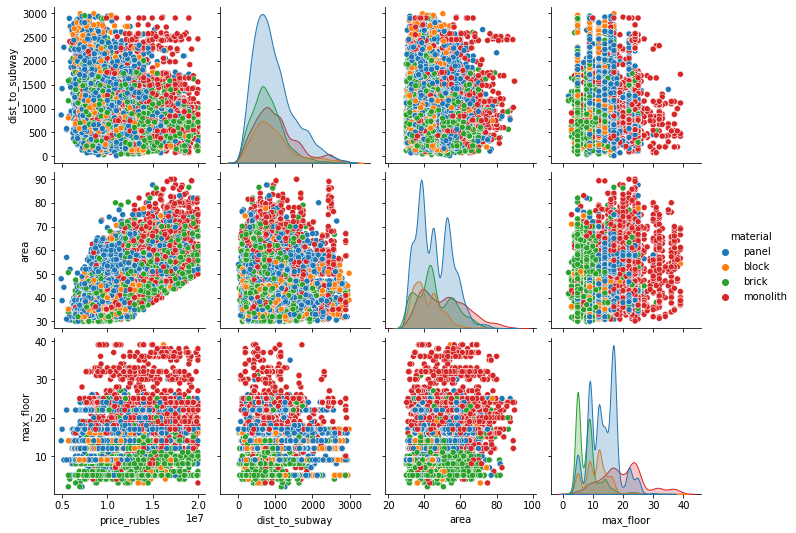

In [107]:
sns.pairplot(
    apartment_listings,
    x_vars=["price_rubles", "dist_to_subway", "area", "max_floor"],
    y_vars=["dist_to_subway", "area", "max_floor"],
    hue="material"
)

The variable we are going to predict is the **“price_rubles”**. 
The price tends to increase when area and the number of rooms increase. We can notice a negative correlations between subway distance to center and distance to subway. Coefficients close to zero show us that there is no linear correlation.

In [108]:
corr_matrix = apartment_listings.corr()
corr_matrix["price_rubles"].sort_values(ascending=False)

price_rubles             1.000000
area                     0.689433
rooms                    0.396066
max_floor                0.342601
floor                    0.224920
lat                      0.040003
agent_offers             0.016465
closest_subway_id       -0.023419
subway_grade            -0.085062
dist_to_subway          -0.133671
subway_offers           -0.172992
house_age               -0.262411
lon                     -0.265155
subway_dist_to_center   -0.366405
Name: price_rubles, dtype: float64

In the cell below, we can see that the most promising variable for predicting the price is the area. You can clearly see the upward trend and that the points are not too dispersed, indicating a strong correlation.

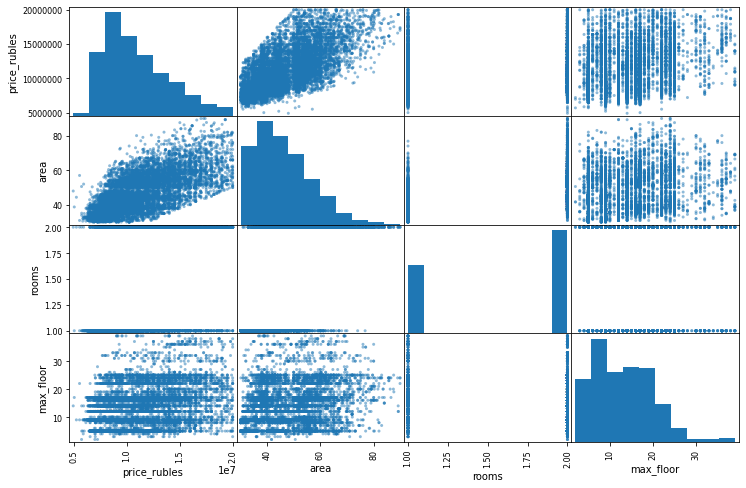

In [109]:
from pandas.plotting import scatter_matrix

attributes = ["price_rubles", "area", "rooms", "max_floor"]
scatter_matrix(apartment_listings[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

We add a new variable “price_per_sqmeter” and see how this variable correlates with the price in rubles.

In [110]:
apartment_listings['price_per_sqmeter'] = apartment_listings['price_rubles']/apartment_listings['area']
corr_matrix = apartment_listings.corr()
corr_matrix["price_rubles"].sort_values(ascending=False)

price_rubles             1.000000
area                     0.689433
price_per_sqmeter        0.586916
rooms                    0.396066
max_floor                0.342601
floor                    0.224920
lat                      0.040003
agent_offers             0.016465
closest_subway_id       -0.023419
subway_grade            -0.085062
dist_to_subway          -0.133671
subway_offers           -0.172992
house_age               -0.262411
lon                     -0.265155
subway_dist_to_center   -0.366405
Name: price_rubles, dtype: float64

This new variable will help us to bundle the districts of Moscow into 3 separate groups: 
1. low price;
2. high price low frequency 
3. high price high frequency.


In [111]:
freq = apartment_listings.groupby('district').count()['dist_to_subway']
mean = apartment_listings.groupby('district').mean()['price_per_sqmeter']
cluster = pd.concat([freq, mean], axis=1)
cluster['district'] = cluster.index
cluster.columns = ['freq', 'price_per_sqmeter','district']
cluster.describe()

,freq,price_per_sqmeter
count,9.000000,9.000000
mean,1353.444444,243252.014420
std,422.232789,29627.324324
min,653.000000,208648.076788
25%,1362.000000,228702.827955
50%,1422.000000,244542.921984
75%,1496.000000,248554.885507
max,2053.000000,311486.223891


**Low price neighborhoods:**
* SVAO - north-east district
* UAO - south district
* UVAO - south-east district
* VAO - east district

In [112]:
cluster1 = cluster[cluster.price_per_sqmeter < 244542]
cluster1.index

Index(['SVAO', 'UAO', 'UVAO', 'VAO'], dtype='object', name='district')

**High price and low frequency neighborhoods:**
* CAO - center district
* SZAO - north-west district

In [113]:
cluster_temp = cluster[cluster.price_per_sqmeter >= 244542]
cluster2 = cluster_temp[cluster_temp.freq < 1422]
cluster2.index

Index(['CAO', 'SZAO'], dtype='object', name='district')

**High price and high frequency neighborhoods:**
* SAO - north district
* UZAO - south-west district
* ZAO - west district

In [114]:
cluster3 = cluster_temp[cluster_temp.freq >= 1422]
cluster3.index

Index(['SAO', 'UZAO', 'ZAO'], dtype='object', name='district')

Group column based on the clusters with three values

In [115]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
apartment_listings['group'] = apartment_listings.district.apply(get_group)

In [116]:
apartment_listings.head(3)

,price_rubles,house_age,closest_subway_id,dist_to_subway,subway_grade,lat,lon,subway_dist_to_center,agent_offers,subway_offers,rooms,area,floor,max_floor,district,material,price_per_sqmeter,group
0,8000000,42,59,960,0,55.609009,37.734632,17166,1,5,1,39.4,11,12,UAO,panel,203045.685279,low_price
1,7200000,43,59,802,0,55.608760,37.741936,17166,1,9,1,35.6,2,9,UAO,panel,202247.191011,low_price
2,10300000,43,59,638,0,55.610207,37.742495,17166,57,9,2,53.0,5,12,UAO,panel,194339.622642,low_price


We drop the following features showed in the cell below because they are not needed for further analysis and prediction.

In [117]:
apartment_listings.drop(["house_age", "closest_subway_id", "subway_grade", 
                         "lat", "lon", "subway_dist_to_center", "agent_offers",
                         "subway_offers", "district", "price_per_sqmeter"],
                          axis=1, inplace=True)
apartment_listings = apartment_listings[['dist_to_subway', 'rooms', 'area', 'floor', 'max_floor', 'material','group', 'price_rubles']]
apartment_listings.head(3)

,dist_to_subway,rooms,area,floor,max_floor,material,group,price_rubles
0,960,1,39.4,11,12,panel,low_price,8000000
1,802,1,35.6,2,9,panel,low_price,7200000
2,638,2,53.0,5,12,panel,low_price,10300000


Creating dummy variables for "group" and "material".

In [118]:
X = apartment_listings[['dist_to_subway', 'rooms', 'area', 'floor', 'max_floor',
                        'material','group']]
Y = apartment_listings['price_rubles']

n = pd.get_dummies(apartment_listings.group)
X = pd.concat([X, n], axis=1)
m = pd.get_dummies(apartment_listings.material)
X = pd.concat([X, m], axis=1)
X.drop(['group', 'material'], inplace=True, axis=1)
X.head(3)

,dist_to_subway,rooms,area,floor,max_floor,high_price_high_freq,high_price_low_freq,low_price,block,brick,monolith,panel
0,960,1,39.4,11,12,0,0,1,0,0,0,1
1,802,1,35.6,2,9,0,0,1,0,0,0,1
2,638,2,53.0,5,12,0,0,1,0,0,0,1


## **Prediction using Machine-Learning algorithms**

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

With **Linear Regression** we predicted **62,54%** variability, which is not impressive but ok.

In [130]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
print('Linear Regression R^2: %.4f' % regressor.score(X_test, y_test))

linear_mse = mean_squared_error(y_pred, y_test)
linear_rmse = np.sqrt(linear_mse)
print('Linear Regression RMSE: %.4f' % linear_rmse)

Linear Regression R^2: 0.6254
Linear Regression RMSE: 1846699.2466


In [125]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

Using **Gradient boosting** we got **67,96%**.

In [131]:
print('Gradient Boosting R^2: %.4f' % model.score(X_test, y_test))

y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R^2: 0.6796
Gradient Boosting RMSE: 1707786.7504


In [122]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Lastly we predict with **Random Forest**. 
The results : **75,17%** and the model predicted the value of every apartment in the test set within **₽1503524($11770)** of the real price.

In [133]:
print('Random Forest R^2: %.4f' % forest_reg.score(X_test, y_test))

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R^2: 0.7517
Random Forest RMSE: 1503523.7480


## Conclusion

The Random Forest model gave us the final result and we are satisfied with that. We need to note that usually Gradient Boosting algorithm outperforms Random Forest algorithm, but not in our case.

For further analysis we can compare,visualize and predict how the price depends on distance to the subway stations by district or by material used for building etc...

This project is done by myself individually.
I hope you found it interesting and helpful.

March 2022,

Skopje, Macedonia.
